In [1]:
# Lookback - FTE

In [1]:
import numpy as np
from scipy.stats import norm
from numpy import random as rdm
import matplotlib.pyplot as plt; plt.style.use('dark_background')
from cycler import cycler as cyc

In [2]:
def BM(Ts,nSim):
    dts = np.diff(Ts,axis=0)[:,np.newaxis]# , keepdim = True)
    W   = np.cumsum(np.sqrt(dts) * rdm.randn(len(dts),nSim),axis=0)
    W   = np.vstack((np.zeros((1,nSim)),W))
    return W

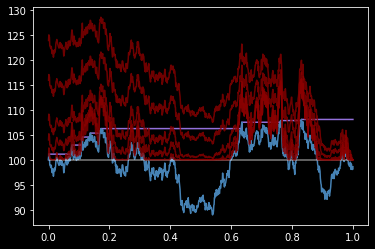

In [3]:
# Embedding
def u(t,x,m,K,sigBa): 
    """Bachelier Embedding"""
    sig_ = sigBa * np.sqrt(np.maximum(T-t,1e-10))
    u1 = x#np.maximum(x - K,0.) 
    u2 = (m-x) * (2*norm.cdf((m-x)/sig_) - 1)
    u3 = 2*sig_ * norm.pdf((m-x)/sig_)
    return u1 + u2 + u3

g = lambda X: np.maximum.accumulate(X,axis = 0) # Lookback forward
#g = lambda X: np.maximum(np.maximum.accumulate(X,axis = 0)-K,0.) # Lookback call

save = 0
x0,K,sigBS,r = 100,100,0.2,0.05

T,N = 1,int(1e3); M = x0
ts  = np.linspace(0,T,N+1)
Ts  = np.array([ts]).T

nSim = 1; rdm.seed(11)
X    = x0 * np.exp(sigBS * BM(ts,nSim) + (r - sigBS**2/2) * Ts)
G    = g(X)
plt.plot(ts,X,color = "steelblue"); plt.plot(ts,G,color = "mediumpurple",zorder = -3); 
plt.hlines(x0,0,T,color = "w",alpha = 0.5)
#sigBa      = 0.7*x0 # Bachelier embedding
for sigBa in [0.3*x0,0.2*x0,0.1*x0,0.05*x0,0.01*x0]:
    Y = u(Ts,X,M,K,sigBa)
    plt.plot(ts,Y,color = "darkred",alpha = 0.8); 
if save: plt.savefig("Figures/Lookback Embedding.pdf",dpi = 500)
plt.show()

Let $f_{\sigma}(X_t) = \iota_{\mathbb{Q}_{\sigma}} g(X_t)$

Firts order Taylor: $t\in [0,T]$
$$ g(X_T) \approx f_{\sigma}(X_t) + \Delta_t f_{\sigma}(X_t) (T - t) + \Delta_x f_{\sigma}(X_t) (x_T - x_t)  $$ 


TypeError: 'function' object is not subscriptable

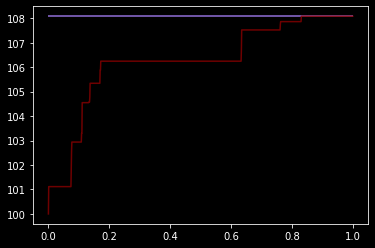

In [4]:
# Functional derivatives:
h,dt = 0.1,0.01

plt.hlines(G[-1],0,T,color = "mediumpurple",alpha = 1.0)
#sigBa      = 0.7*x0 # Bachelier embedding
for sigBa in [0.1*x0]:#,0.05*x0,0.01*x0]:
    Y      = u(Ts,X,M,K,sigBa)
    DeltaT = (u(Ts+dt,X,M,K,sigBa) - u(Ts,X,M,K,sigBa))/dt
    DeltaX = (u(Ts,X + h,M + h*(X == M),K,sigBa) - u(Ts,X,M,K,sigBa))/h
    G1     = Y + DeltaT * (T - Ts) + DeltaX * (X[-1] - X)
    #plt.plot(ts,x0*DeltaX,color = "darkred",alpha = 0.8); 
    #plt.plot(ts,x0*DeltaT,color = "darkred",alpha = 0.8); 
    plt.plot(ts,G,color = "darkred",alpha = 0.8);
    plt.scatter(0,g[0],color = "crimson",alpha = 1.0,zorder = 2);
if save: plt.savefig("Figures/Lookback Embedding.pdf",dpi = 500)
plt.show()

In [ ]:
T,N = 1,int(1e3)
ts  = np.linspace(0,T,N+1)
Ts  = np.array([ts]).T

# Functional derivatives:
h,dt = 0.1,0.01; sigBa = 0.001

nSim = 1000; rdm.seed(11)
X    = x0 * np.exp(sigBS * BM(ts,nSim) + (r - sigBS**2/2) * Ts)
G = g(X); g0 = G[0]; gT = G[-1]
DeltaT = (u(dt,x0,g0,K,sigBa) - u(0.,x0,g0,K,sigBa))/dt
DeltaX = (u(0.,x0 + h,g0 + h * (x0 == g0),K,sigBa) - u(0.,x0,g0,K,sigBa))/h
#DeltaXX = (u(0.,x0 + h,g0 + h * (x0 == g0),K,sigBa) - 2*u(0.,x0,g0,K,sigBa) \
#       + u(0.,x0 - h,g0,K,sigBa))/h**2
g10    = Y[0] + DeltaT * T + DeltaX * (X[-1] - x0) # + DeltaXX * (X[-1] - x0)**2/2
plt.scatter(gT,g10,s = 3,color = "w"); plt.xlabel(r"$g(X_T)$"); plt.ylabel(r"$\hat{g}_1(X_T)$")
xMin,xMax = min(np.min(gT),np.min(g10)), max(np.max(gT),np.max(g10))
plt.plot([xMin,xMax],[xMin,xMax],color = "w")
plt.show()

In [5]:
u(0.,x0 + h,g0 + h * (x0 == g0),K,sigBa)[0], u(0.,x0 - h,g0,K,sigBa)[0]

NameError: name 'g0' is not defined

In [6]:
g10

NameError: name 'g10' is not defined